In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/taejoonkim/desktop/csc/csc422/PROJECT/CSV/data.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [4]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
# For regression, it is particularly important to normalize our data before
# training the model, so we can better interpret our coefficients
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_unscaled)
X_train = scaler.transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [6]:
lrm = LinearRegression(normalize=False)
lrm.fit(X_train, y_train)
importance = lrm.coef_
print(importance)
print(f'alpha = {lrm.intercept_}')

[ 2.01792900e-04 -9.25075646e-03  2.30658159e-04  4.43488628e-03
 -1.63142110e+00 -4.76635388e-02  1.82226158e+02 -1.50350283e+02
 -1.87107146e-01  7.45910243e+01  5.05034869e-02  1.45570098e-04
 -1.67610691e-03 -1.88798984e-02 -7.26573888e-04  3.68458285e-05
 -1.09694363e-02  1.51004843e-02 -5.48878924e-03 -1.11500930e-03
 -9.54174367e-04  1.18077583e-02 -6.22191998e-05  3.10204959e-03
  2.59006614e-04  6.36916444e-04 -9.88187970e-05 -2.15149896e-04
 -2.78421821e-04 -4.13218536e-04 -2.00839162e-03 -6.70893200e-04
  1.99004072e-03 -3.66693694e-05 -1.17087356e-03  1.51971006e-04
  1.26821590e-02  1.10057722e+11  1.10057722e+11  2.02832848e-03
  4.15941861e-03 -1.17323747e-02 -6.60357131e-04  1.41018144e-03
 -5.35426860e-03 -5.14635402e-03 -4.59411069e-04 -1.07420929e-04
 -5.09818712e-04  1.93526964e-03  4.00726419e-03 -1.44701643e-02
  3.06641329e-04 -2.96440206e-04  1.42304574e+05  2.72119861e-03
 -1.43731396e+05  2.43822602e-03  1.69448123e-04  4.80456166e-04
  1.08302465e+05  3.13900

In [7]:

def alda_regression_lasso(X_train, X_test, y_train, random_state=0):
    lrm = LassoCV(cv=10, random_state = random_state).fit(X_train, y_train)
    pred = lrm.predict(X_test)
    result = (lrm, pred)
    return result

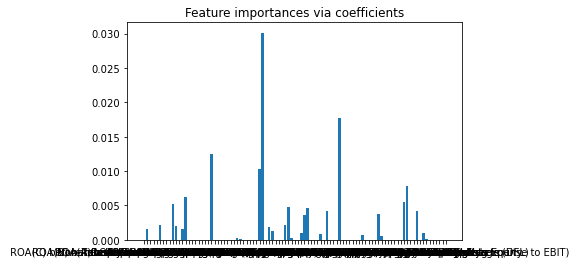

[0.00000000e+00 1.61789737e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.09688892e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.16934309e-03 2.05387470e-03 0.00000000e+00
 1.49934732e-03 6.18170779e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.24238986e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.10052562e-04 6.47645591e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.03665208e-02 3.01211240e-02 1.47188504e-16 1.85414171e-03
 1.23164554e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.13561809e-03 4.75467337e-03 2.05945808e-04 0.00000000e+00
 0.00000000e+00 1.02295282e-03 3.55873514e-03 4.60157607e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.72587126e-04
 0.00000000e+00 4.13702309e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.76568818e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [9]:

lasso_model, lasso_predictions = alda_regression_lasso(X_train, X_test, y_train)
importance = np.abs(lasso_model.coef_)
    
plt.bar(height=importance, x=df.columns[:95])
plt.title("Feature importances via coefficients")
plt.show()

print(importance)
coef_list = []
for i in range(len(importance)):
    bestAttributeIdx = np.argmax(importance)
    coef_list.append(bestAttributeIdx)
    importance[bestAttributeIdx] = 0
for i in coef_list[:10]:
    print(df.columns[i])
          

